# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_multi['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [15]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [16]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [17]:
h = 1150.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1250

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,5*1e6] 

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-15.9670910755 -7.68662230507
0.115553279585
i = 1
-20.1088129217 -5.01326251812
0.0855797615283
i = 2
-23.1836052365 -2.26941429467
0.0647773061367
i = 3
-25.5628929393 0.434289032912
0.0506508695075
i = 4
-27.4605424481 3.15675189479
0.0431801228004
i = 5
-28.9540597719 5.89852530102
0.0383438390835
i = 6
-30.0517575028 8.61087259609
0.0339213108408
i = 7
-30.8142868319 11.1659738977
0.0287985687465
i = 8
-31.3058805911 13.5049593128
0.0238178063796
i = 9
-31.5742821109 15.613736362
0.0194996949835
i = 10
-31.679201576 17.4753941158
0.0156240402919
i = 11
-31.6778964771 19.1008696302
0.0123924983623
i = 12
-31.6068687135 20.4974740722
0.0095638152784
i = 13
-31.4962152784 21.6814096423
0.00718442963748
i = 14
-31.3710150139 22.6754671471
0.00526957884727
i = 15
-31.2464611928 23.5112636149
0.00384934952396
i = 16
-31.1248340058 24.2175316356
0.00283388149258
i = 17
-31.0130452101 24.8161843336
0.00208208625082
i = 18
-30.9125713332 25.3359907615
0.00159294225673
i = 19
-30.8227

-19.1907650408 42.6903301822
0.00013256198359
i = 154
-19.1237052221 42.7443537354
0.000131277012592
i = 155
-19.0570505755 42.7977736611
0.000129951109747
i = 156
-18.9908097731 42.8505811298
0.000128585227945
i = 157
-18.9250054717 42.902771631
0.000127147203764
i = 158
-18.8596557063 42.9543528967
0.000125667400265
i = 159
-18.7947532667 43.0053215775
0.000124200074274
i = 160
-18.730288679 43.0556771281
0.00012275562317
i = 161
-18.6662774184 43.1054217705
0.000121270024069
i = 162
-18.60279002 43.154481604
0.000119490961292
i = 163
-18.5398437049 43.2028515407
0.000117658482165
i = 164
-18.4774471115 43.2505214104
0.000115790154502
i = 165
-18.4156061585 43.2974897864
0.000113905866646
i = 166
-18.3543343047 43.3437500478
0.000111978834606
i = 167
-18.2937720257 43.389065728
0.000109373087777
i = 168
-18.2339332838 43.4334332175
0.00010674147477
i = 169
-18.1747984249 43.4769457207
0.000104297341888
i = 170
-18.1163762128 43.5196061363
0.000101847716879
i = 171
-18.1163762128 43.5

-20.5294133475 41.5623572837
0.000150395846795
i = 135
-20.4562664077 41.62685659
0.000149590969672
i = 136
-20.3833822777 41.6907591044
0.000148752756722
i = 137
-20.3107706454 41.7540625039
0.000147880094959
i = 138
-20.2384364863 41.8167659187
0.00014698799545
i = 139
-20.1663760579 41.8789041217
0.000146156151923
i = 140
-20.0946299099 41.9404923787
0.000145227433012
i = 141
-20.02318591 42.0015679132
0.000144384314751
i = 142
-19.9520412192 42.062003957
0.000143355098729
i = 143
-19.8812044139 42.1217635963
0.000142243744933
i = 144
-19.8106871404 42.1808982063
0.000141172477299
i = 145
-19.7404913729 42.239468587
0.000140182561012
i = 146
-19.6706053838 42.2975259319
0.000139298675124
i = 147
-19.6010348633 42.3550881974
0.000138420583075
i = 148
-19.5317883211 42.4121628588
0.000137524859434
i = 149
-19.4628710491 42.4687583931
0.000136622124859
i = 150
-19.3942817666 42.5249003667
0.000135753610519
i = 151
-19.3260691356 42.5805499337
0.000134688218085
i = 152
-19.2582402675 42

-21.9801408065 40.2269864431
0.000164768419784
i = 116
-21.9014507635 40.3024587393
0.00016452134339
i = 117
-21.8229496797 40.377398366
0.000164071316522
i = 118
-21.7446536692 40.4517976894
0.000163561782915
i = 119
-21.6665800188 40.5256405412
0.000162974057532
i = 120
-21.5887384783 40.5989131533
0.000162334191173
i = 121
-21.5111432458 40.6715932174
0.000161617104879
i = 122
-21.4337996735 40.7436760237
0.000160873738156
i = 123
-21.3567333079 40.8150630895
0.000159904010927
i = 124
-21.279974743 40.885668013
0.000158713792191
i = 125
-21.2035416789 40.9556325658
0.000157691510934
i = 126
-21.1274431507 41.0250048478
0.000156714178892
i = 127
-21.0516763568 41.0938517788
0.000155841229576
i = 128
-20.9762353205 41.1622064093
0.000155028428761
i = 129
-20.9011413206 41.2300381349
0.000154104218127
i = 130
-20.8263929934 41.2973196982
0.000153135916916
i = 131
-20.7519814186 41.3640766045
0.000152226607871
i = 132
-20.677932425 41.4303041706
0.000151235354061
i = 133
-20.6042549807 

-23.5802116129 38.6195580819
0.000161423256517
i = 97
-23.4994910218 38.7064577211
0.000159505234958
i = 98
-23.4190155338 38.7920428742
0.000157793556879
i = 99
-23.3388116487 38.8763908728
0.000156140026116
i = 100
-23.2589050067 38.9596108763
0.000154589864228
i = 101
-23.1793037366 39.0417599439
0.000153104716289
i = 102
-23.1000253203 39.1228733084
0.000151629520545
i = 103
-23.0210573389 39.2030242695
0.000150290089197
i = 104
-22.942337378 39.2823553573
0.000149304864426
i = 105
-22.8638840581 39.3608850178
0.000148299547724
i = 106
-22.7856321112 39.4388113162
0.000147734661309
i = 107
-22.7075287664 39.5162410846
0.000147448651325
i = 108
-22.6295826611 39.5931685745
0.000147131828959
i = 109
-22.5517869306 39.6696662756
0.000146932658097
i = 110
-22.474159218 39.745810449
0.000146797928459
i = 111
-22.396707674 39.8216506768
0.000146712381781
i = 112
-22.3194316857 39.8971756154
0.000146609323394
i = 113
-22.2423113033 39.9723297866
0.000146472474626
i = 114
-22.1653396708 40

-25.0986705951 36.7062229355
0.000103737543716
i = 84
-25.0275359752 36.7868857413
0.000102152712443
i = 85
-24.9568494204 36.8666686086
0.000100899646676
i = 86
-24.9568494204 36.8666686086
0.0
i = 0
-16.0679001373 -7.576591249
0.101397959354
i = 1
-20.250077206 -4.65029405989
0.0742129263239
i = 2
-23.3621305577 -1.71886114723
0.0551899095964
i = 3
-25.7630934891 1.2406965165
0.0444059998379
i = 4
-27.6230714087 4.20824507982
0.0375768733437
i = 5
-29.0477293009 7.14116830409
0.0328927094335
i = 6
-30.0600318419 9.98274513982
0.0286181830782
i = 7
-30.7203015575 12.6058074015
0.0236321850461
i = 8
-31.1080641381 14.9449709015
0.0187830210829
i = 9
-31.2862586293 16.9960901859
0.0147109609694
i = 10
-31.3245594246 18.7576766457
0.0112298012594
i = 11
-31.2784949032 20.2498323766
0.00839532875863
i = 12
-31.1849396261 21.4951871223
0.00609834611508
i = 13
-31.0696539174 22.526955134
0.00435444306549
i = 14
-30.9513557057 23.3820927744
0.00309172554584
i = 15
-30.8403117331 24.097208702

## L-curve visualization

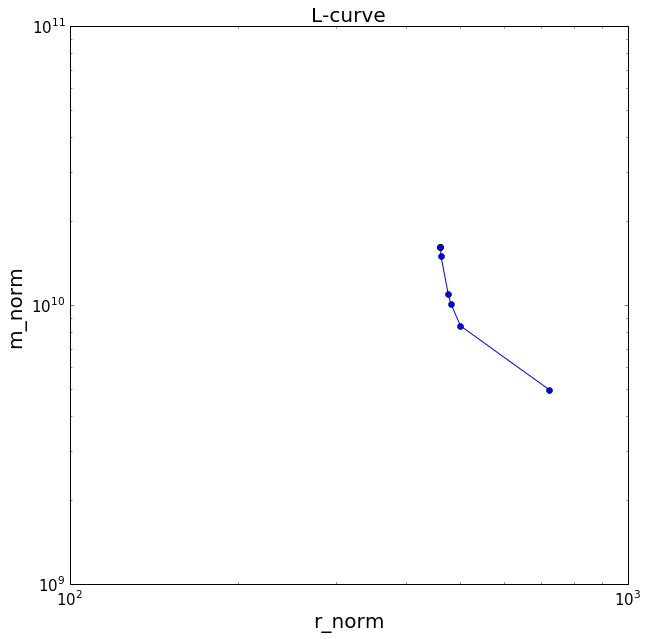

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
